### PROYECTO: PREDICCIÓN DE LA TASA DE DESEMPLEO EN COLOMBIA: UN ESTUDIO COMPARATIVO DE MODELOS HÍBRIDOS Y AVANZADOS.

#### Elaborado por: Yairo Oviedo

In [63]:
#CARGUE DE LIBRERIAS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [65]:
# LECTURA DE DATASET

file_path = 'TD_BUSQUEDAS_GOOGLE.csv'

# Leer el archivo CSV
df = pd.read_csv(file_path,sep=";")

# Reemplazar comas por puntos en todas las columnas de tipo string
df = df.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
df["Tasa Desempleo"] = df["Tasa Desempleo"].astype(float)
# Convertir la columna de fechas a tipo datetime
df['Mes'] = pd.to_datetime(df['Mes'], format='%Y-%m')
# Información dataset original
df = df.iloc[:-2]
df.head()

,Mes,Tasa Desempleo,elempleo: (Colombia),empleo en colombia: (Colombia),bolsa de empleo: (Colombia),empleos: (Colombia),trabajo: (Colombia),empleo: (Colombia),empleo colombia: (Colombia),el empleo: (Colombia),...,oferta de empleo: (Colombia),empleo medellin: (Colombia),empleo en bogota: (Colombia),agencia publica de empleo: (Colombia),computrabajo: (Colombia),ofertas de empleo: (Colombia),agencia de empleo: (Colombia),empleo sena: (Colombia),servicio empleo: (Colombia),empleo bogota: (Colombia)
0,2004-01-01,17.26,51,100,78,85,72,79,100,41,...,0,68,0,0,0,100,0,47,0,62
1,2004-02-01,15.75,43,62,58,52,75,48,66,30,...,0,0,59,0,0,52,0,31,0,44
2,2004-03-01,13.52,38,55,56,32,71,41,52,31,...,0,58,0,0,0,30,0,14,0,27
3,2004-04-01,14.68,44,65,45,40,79,44,59,32,...,0,0,0,0,0,43,0,15,0,35
4,2004-05-01,13.83,30,46,47,39,85,43,47,32,...,0,0,0,0,0,32,0,18,0,43


In [54]:
# lIMPIEZA DE DATOS

# Renombrar las columnas eliminando ": (Colombia)"
df.rename(columns=lambda x: x.replace(': (Colombia)', ''), inplace=True)

# Mostrar información inicial del DataFrame
print("Información inicial del DataFrame:")
df.info()

Información inicial del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Mes                         243 non-null    datetime64[ns]
 1   Tasa Desempleo              243 non-null    float64       
 2   elempleo                    243 non-null    int64         
 3   empleo en colombia          243 non-null    int64         
 4   bolsa de empleo             243 non-null    int64         
 5   empleos                     243 non-null    int64         
 6   trabajo                     243 non-null    int64         
 7   empleo                      243 non-null    int64         
 8   empleo colombia             243 non-null    int64         
 9   el empleo                   243 non-null    int64         
 10  linkedin                    243 non-null    int64         
 11  buscador de empleo     

In [55]:
# 1. Identificar y manejar valores faltantes
missing_values = df.isnull().sum()
print("\nValores faltantes por columna:")
print(missing_values)


Valores faltantes por columna:
Mes                           0
Tasa Desempleo                0
elempleo                      0
empleo en colombia            0
bolsa de empleo               0
empleos                       0
trabajo                       0
empleo                        0
empleo colombia               0
el empleo                     0
linkedin                      0
buscador de empleo            0
teletrabajo                   0
trabajo sin experiencia       0
agencia de empleo sena        0
servicio publico de empleo    0
sena servicio de empleo       0
empleo en medellin            0
el empleo bogota              0
empleo cali                   0
empleo sin experiencia        0
el empleo colombia            0
oferta de empleo              0
empleo medellin               0
empleo en bogota              0
agencia publica de empleo     0
computrabajo                  0
ofertas de empleo             0
agencia de empleo             0
empleo sena                   0
servicio

In [56]:
# Eliminar filas con valores faltantes (opcional)
df_cleaned = df.dropna()

# Identificar y eliminar duplicados
duplicated_rows = df_cleaned.duplicated().sum()
print("\nNúmero de filas duplicadas:", duplicated_rows)

# Mostrar información del DataFrame limpio
print("\nInformación del DataFrame limpio:")
df_cleaned.info()



Número de filas duplicadas: 0

Información del DataFrame limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Mes                         243 non-null    datetime64[ns]
 1   Tasa Desempleo              243 non-null    float64       
 2   elempleo                    243 non-null    int64         
 3   empleo en colombia          243 non-null    int64         
 4   bolsa de empleo             243 non-null    int64         
 5   empleos                     243 non-null    int64         
 6   trabajo                     243 non-null    int64         
 7   empleo                      243 non-null    int64         
 8   empleo colombia             243 non-null    int64         
 9   el empleo                   243 non-null    int64         
 10  linkedin                    243 non-null    int64       

In [62]:
# Resumen estadístico
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tasa Desempleo,243.0,11.334280,2.212819,7.56,9.755,11.08,12.2,21.97
elempleo,243.0,44.452675,22.152944,6.00,26.000,49.00,60.0,100.00
empleo en colombia,243.0,18.156379,13.376935,4.00,8.000,15.00,23.0,100.00
bolsa de empleo,243.0,34.325103,15.947139,11.00,24.000,30.00,45.0,100.00
empleos,243.0,37.115226,13.073027,14.00,28.000,36.00,44.0,100.00
trabajo,243.0,61.617284,10.971678,32.00,55.000,61.00,69.0,100.00
empleo,243.0,51.106996,12.559152,26.00,43.000,50.00,58.5,100.00
empleo colombia,243.0,23.477366,13.453720,5.00,13.000,23.00,30.0,100.00
el empleo,243.0,49.650206,18.255902,15.00,35.000,52.00,62.5,100.00
linkedin,243.0,30.539095,25.783938,0.00,0.000,37.00,47.0,100.00


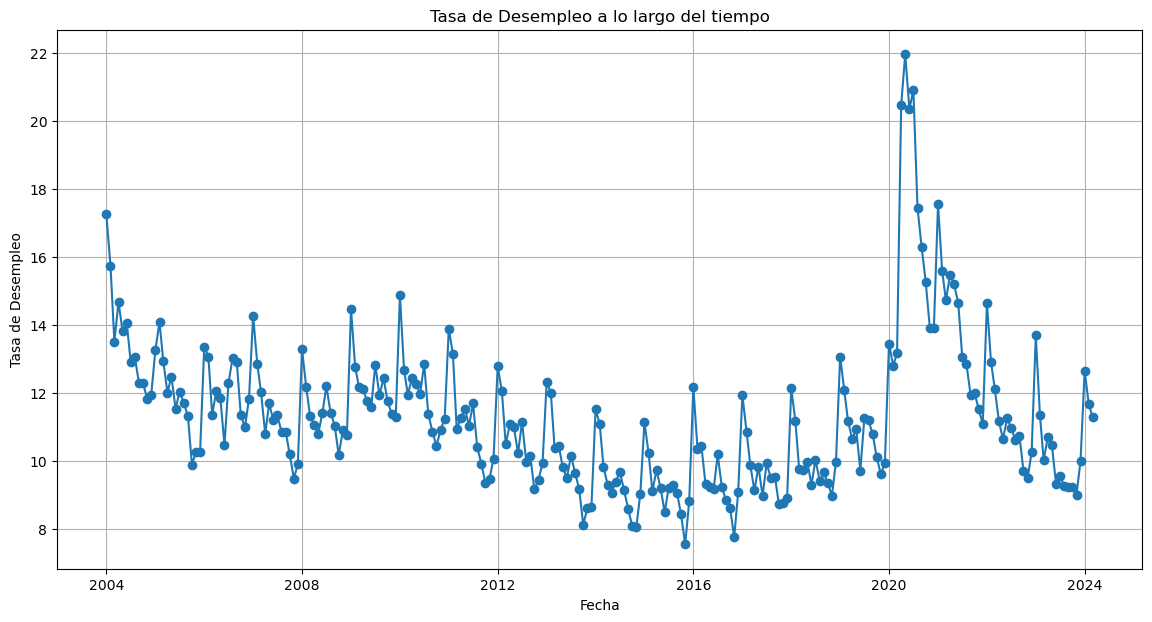

In [58]:
# Visualización de la serie temporal de la Tasa de Desempleo
plt.figure(figsize=(14, 7))
plt.plot(df_cleaned["Mes"], df_cleaned['Tasa Desempleo'], marker='o')
plt.title('Tasa de Desempleo a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Desempleo')
plt.grid(True)
plt.show()


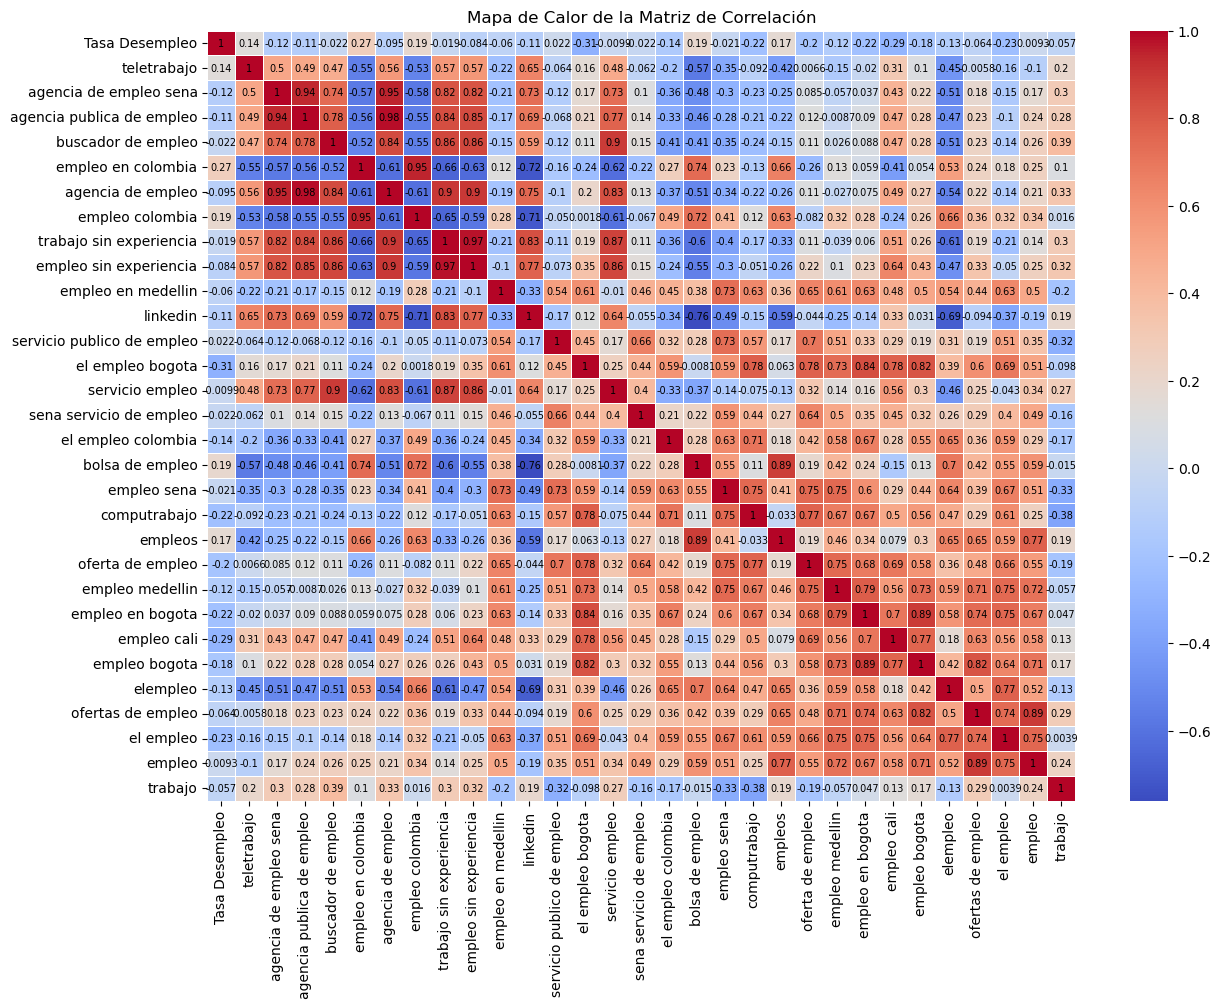

In [59]:

# Asegurarse de que la columna de fecha esté en formato datetime
df_cleaned['Mes'] = pd.to_datetime(df_cleaned['Mes'])

# Definir el rango de fechas para filtrar
fecha_inicio = '2004-01-01'
fecha_fin = '2024-04-01'

# Filtrar el DataFrame por el rango de fechas
df_filtered = df_cleaned[(df_cleaned['Mes'] >= fecha_inicio) & (df_cleaned['Mes'] <= fecha_fin)]

# Imprimir los nombres de las columnas del DataFrame
#print(df_filtered.columns)

# Nombre correcto de la columna basado en la impresión anterior
tasa_desempleo = "Tasa Desempleo"

# Columnas seleccionadas con los nombres corregidos
selected_columns = ["Tasa Desempleo", "el empleo", "empleo", "empleo sena", "servicio empleo", "empleo bogota", "computrabajo", 
                    "ofertas de empleo", "empleo colombia", "agencia de empleo", "trabajo", "bolsa de empleo", "empleo medellin",
                    "empleos", "empleo en bogota", "agencia publica de empleo", "empleo cali", "empleo en colombia", 
                    "empleo sin experiencia", "el empleo colombia", "oferta de empleo", "agencia de empleo sena", 
                    "servicio publico de empleo", "sena servicio de empleo", "empleo en medellin", "el empleo bogota", 
                    "linkedin", "elempleo", "buscador de empleo", "teletrabajo", "trabajo sin experiencia"]

# Filtrar las columnas para incluir solo las que están presentes en df_cleaned
filtered_columns = [col for col in selected_columns if col in df_filtered.columns]

# Verificar si "Tasa Desempleo" existe en el DataFrame
if tasa_desempleo not in df_filtered.columns:
    print(f"Error: '{tasa_desempleo}' no se encuentra en el DataFrame.")
else:
    # Separar "Tasa Desempleo" y calcular el promedio de cada columna restante
    remaining_columns = [col for col in filtered_columns if col != tasa_desempleo]
    means = df_filtered[remaining_columns].mean().sort_values()

    # Ordenar las columnas del DataFrame según el promedio
    sorted_columns = [tasa_desempleo] + means.index.tolist()

    # Crear el heatmap
    plt.figure(figsize=(14, 10))
    correlation_matrix = df_filtered[sorted_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 7, "color": "black"})
    plt.title('Mapa de Calor de la Matriz de Correlación')
    plt.show()




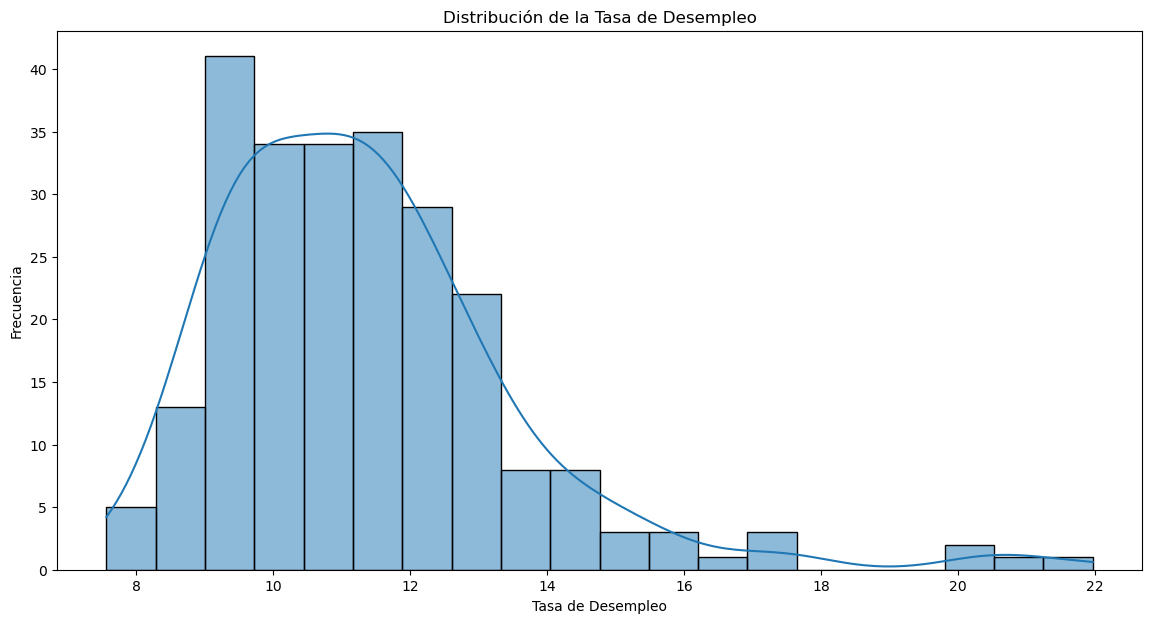

In [39]:
# 4. Histograma: Distribución de la Tasa de Desempleo
plt.figure(figsize=(14, 7))
sns.histplot(df_cleaned['Tasa Desempleo'], bins=20, kde=True)
plt.title('Distribución de la Tasa de Desempleo')
plt.xlabel('Tasa de Desempleo')
plt.ylabel('Frecuencia')
plt.show()

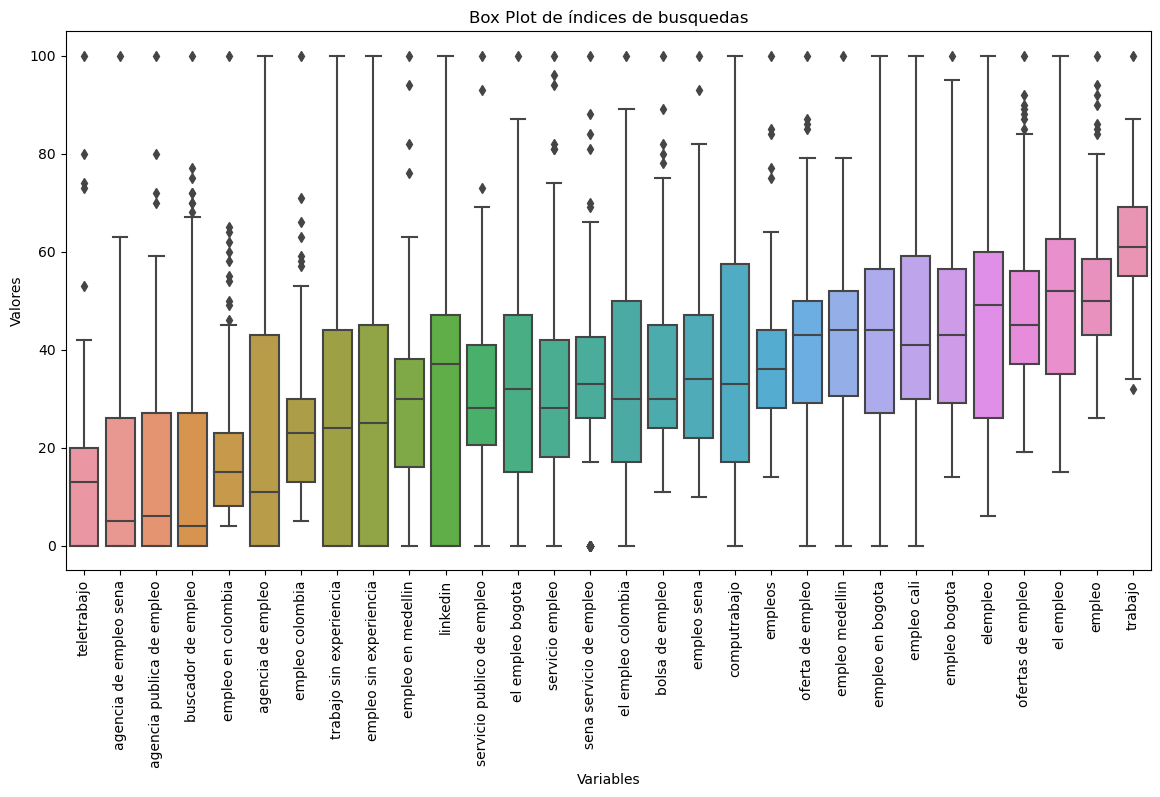

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que df_cleaned es tu DataFrame ya cargado y limpiado
# selected_columns es tu lista de columnas de interés
selected_columns = ["el empleo","empleo","empleo sena","servicio empleo" ,"empleo bogota","computrabajo","ofertas de empleo","empleo colombia",
           "agencia de empleo","trabajo","bolsa de empleo","empleo medellin",
           "empleos","empleo en bogota","agencia publica de empleo","empleo cali",
           "empleo en colombia","empleo sin experiencia","el empleo colombia",
           "oferta de empleo","agencia de empleo sena","servicio publico de empleo",
           "sena servicio de empleo","empleo en medellin","el empleo bogota",
            "linkedin","elempleo","buscador de empleo","teletrabajo","trabajo sin experiencia"]

# Calcular el promedio de cada columna
means = df_cleaned[selected_columns].mean().sort_values()

# Ordenar las columnas del DataFrame según el promedio
sorted_columns = means.index.tolist()

# Crear el gráfico de box plot
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_cleaned[sorted_columns])
plt.title('Box Plot de índices de busquedas')
plt.xlabel('Variables')
plt.ylabel('Valores')

# Ajustar la visualización del nombre del eje x
plt.xticks(rotation=90)
plt.show()

Varianza explicada por cada componente principal: [0.36733727 0.30973093 0.1068689  0.05929946 0.02325899 0.0188617
 0.01821482 0.01553855 0.01419279 0.0124875  0.00970807]
Varianza explicada acumulada: [0.36733727 0.6770682  0.7839371  0.84323656 0.86649555 0.88535725
 0.90357207 0.91911062 0.93330341 0.94579091 0.95549898]


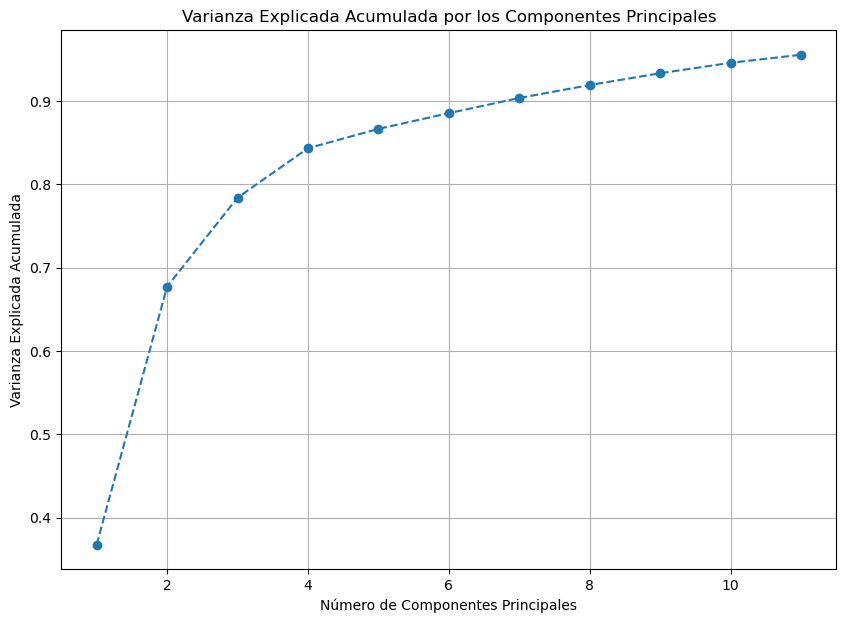

Número de componentes principales seleccionados: 11
Número de componentes principales con autovalores > 1: 4


In [27]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#ANALISIS DE COMPONENTES PRINCIPALES 
file_path = 'TD_BUSQUEDAS_GOOGLE.csv'

df_cleaned = pd.read_csv(file_path, sep=";", parse_dates=['Mes'], index_col='Mes')


# Asegurarse de que solo las columnas numéricas estén en formato float
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':
        df_cleaned[col] = df_cleaned[col].str.replace(',', '.').astype(float)

# Separar las variables predictoras y la variable objetivo
X = df_cleaned.drop(columns=['Tasa Desempleo'])  # Excluye la columna objetivo y 'Mes' que ya está excluida
y = df_cleaned['Tasa Desempleo']

# Estandarizar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para retener el 95% de la varianza
pca = PCA(n_components=0.95)
#pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explicar la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por cada componente principal: {explained_variance}")
print(f"Varianza explicada acumulada: {explained_variance.cumsum()}")

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por los Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

# Número de componentes seleccionados
n_components_selected = X_pca.shape[1]
print(f"Número de componentes principales seleccionados: {n_components_selected}")


# Calcular autovalores
eigenvalues = pca.explained_variance_

# Seleccionar componentes con autovalores mayores que 1
selected_components = np.sum(eigenvalues > 1)
print(f"Número de componentes principales con autovalores > 1: {selected_components}")

In [28]:
print(eigenvalues)

[11.06528242  9.33000967  3.21920657  1.78627463  0.70062949  0.56817003
  0.54868427  0.46806686  0.42752863  0.37616048  0.29243571]


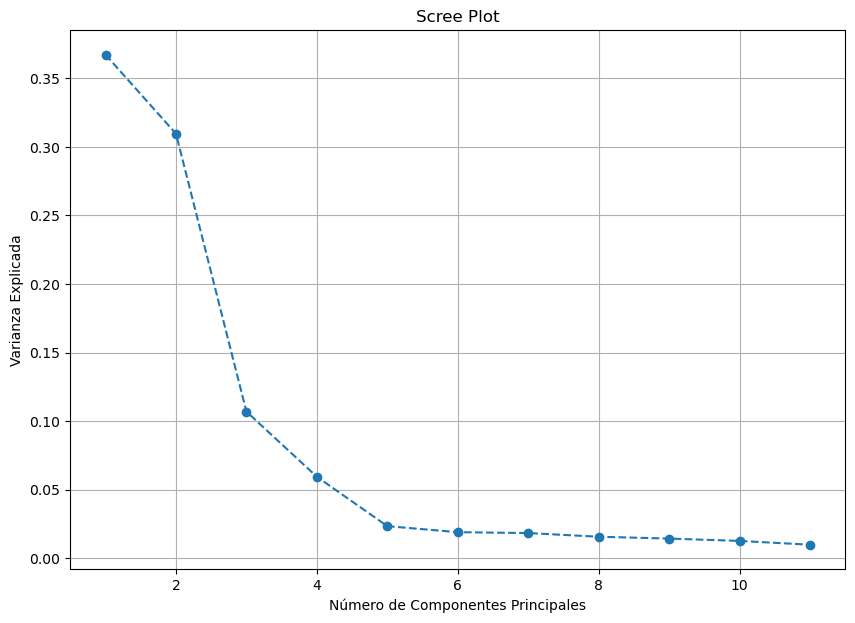

In [29]:
# Varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Graficar el Scree Plot
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.grid(True)
plt.show()

In [30]:
print(pca)

PCA(n_components=0.95)


### MAP TEST (Minimum Average Partial) PARA CONSERVAR COMPONENTES PRINCIPALES

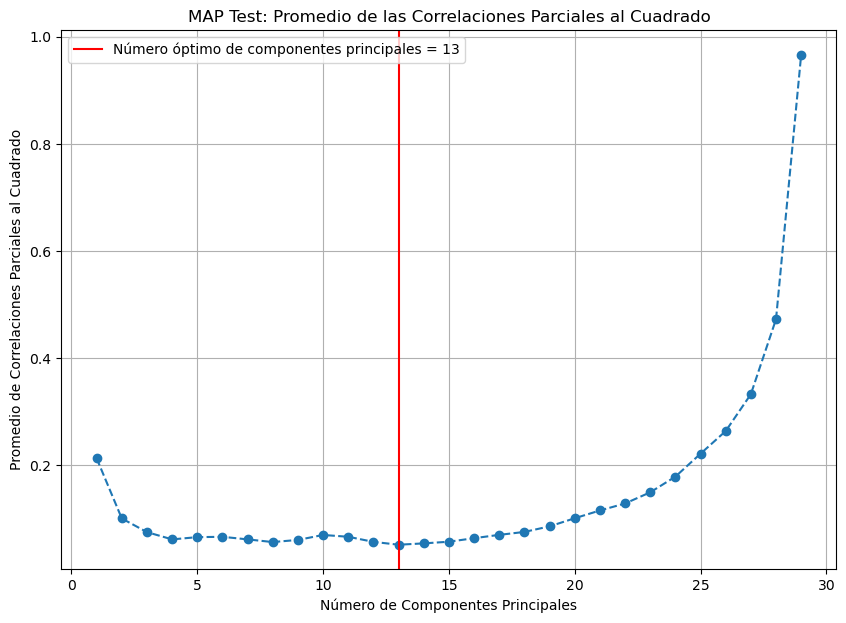

Número óptimo de componentes principales según el método MAP: 13


In [32]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def calculate_partial_correlations(data, components):
    residuals = data - data.dot(components.T).dot(components)
    p_corr = np.corrcoef(residuals.T)
    np.fill_diagonal(p_corr, 0)  # Ignore the diagonal elements
    return np.mean(p_corr**2)

def map_test(data, max_components):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    pca = PCA()
    pca.fit(data_scaled)
    
    components = pca.components_
    partial_corrs = []
    
    for k in range(1, max_components + 1):
        comp = components[:k, :]
        partial_corr = calculate_partial_correlations(data_scaled, comp)
        partial_corrs.append(partial_corr)
    
    return partial_corrs

# Leer el archivo CSV limpio
file_path = 'TD_BUSQUEDAS_GOOGLE.csv'
df_cleaned = pd.read_csv(file_path, sep=";", parse_dates=['Mes'], index_col='Mes')

 #Rango de fechas a filtrar
fecha_inicio = '2014-01-01'
fecha_fin = '2024-04-30'

# Filtrar el DataFrame para el rango de fechas
df_cleaned = df_cleaned.loc[fecha_inicio:fecha_fin]

# Convertir las columnas de tipo object a float, si es necesario
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':
        df_cleaned[col] = df_cleaned[col].str.replace(',', '.').astype(float)

# Separar las variables predictoras y la variable objetivo, excluyendo 'Mes'
X = df_cleaned.drop(columns=['Tasa Desempleo'])

# Realizar el test MAP
max_components = X.shape[1] - 1  # Número máximo de componentes posibles
partial_corrs = map_test(X, max_components)

# Encontrar el número óptimo de componentes
optimal_components = np.argmin(partial_corrs) + 1  # Sumar 1 porque el índice es 0-basado

# Graficar el test MAP
plt.figure(figsize=(10, 7))
plt.plot(range(1, max_components + 1), partial_corrs, marker='o', linestyle='--')
plt.axvline(x=optimal_components, color='r', linestyle='-', label=f'Número óptimo de componentes principales = {optimal_components}')
plt.title('MAP Test: Promedio de las Correlaciones Parciales al Cuadrado')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Promedio de Correlaciones Parciales al Cuadrado')
plt.legend()
plt.grid(True)
plt.show()

print(f"Número óptimo de componentes principales según el método MAP: {optimal_components}")


### VARIANZA EXPLICADA AL 95% DE PCA

Varianza explicada acumulada por los componentes seleccionados: [0.36733727 0.6770682  0.7839371  0.84323656 0.86649555 0.88535725
 0.90357207 0.91911062 0.93330341 0.94579091 0.95549898]
Número de componentes principales para retener el 95% de la varianza: 11


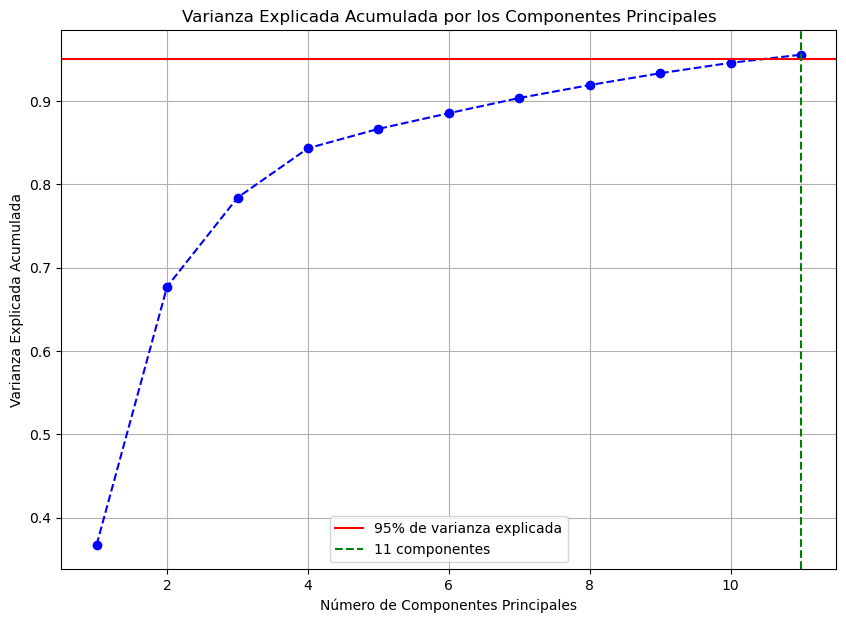

In [34]:
# Aplicar PCA para retener el 95% de la varianza
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)

# Explicar la varianza explicada por cada componente principal
explained_variance_95 = pca_95.explained_variance_ratio_
print(f"Varianza explicada acumulada por los componentes seleccionados: {explained_variance_95.cumsum()}")

# Número de componentes seleccionados
n_components_95 = X_pca_95.shape[1]
print(f"Número de componentes principales para retener el 95% de la varianza: {n_components_95}")

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance_95) + 1), explained_variance_95.cumsum(), marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% de varianza explicada')
plt.axvline(x=n_components_95, color='g', linestyle='--', label=f'{n_components_95} componentes')
plt.title('Varianza Explicada Acumulada por los Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.legend()
plt.grid(True)
plt.show()


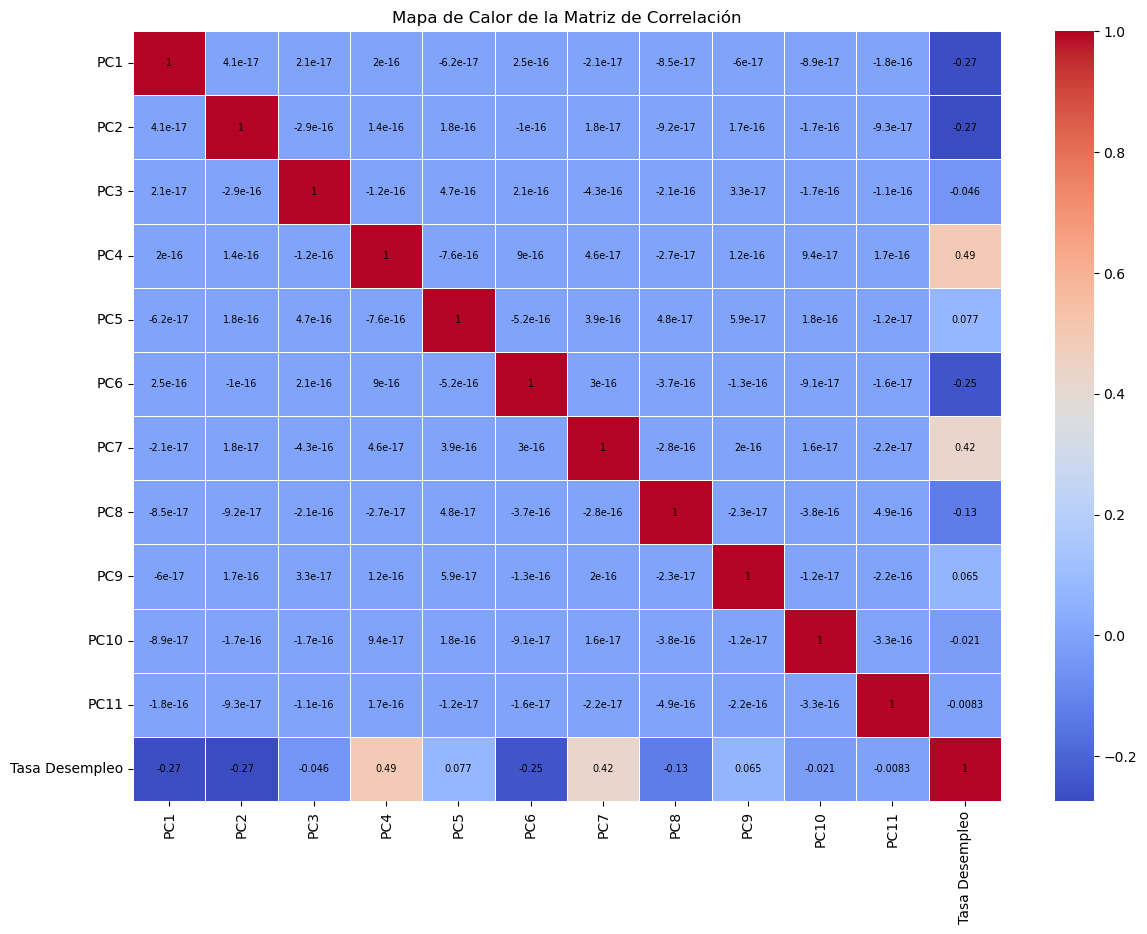

In [45]:
# Heatmap: Matriz de correlación
plt.figure(figsize=(14, 10))
correlation_matrix = df_pca.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,annot_kws={"size": 7, "color": "black"})
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

### COMPONENTES PRINCIPALES

In [46]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Establecer la semilla aleatoria
seed = 42
np.random.seed(seed)

# Función para calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Leer el archivo CSV limpio
file_path = 'TD_BUSQUEDAS_GOOGLE.csv'
df_cleaned = pd.read_csv(file_path, sep=";", parse_dates=['Mes'], index_col='Mes')

 #Rango de fechas a filtrar
fecha_inicio = '2014-01-01'
fecha_fin = '2024-04-30'

# Filtrar el DataFrame para el rango de fechas
df_cleaned = df_cleaned.loc[fecha_inicio:fecha_fin]

# Convertir las columnas de tipo object a float, si es necesario
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':
        df_cleaned[col] = df_cleaned[col].str.replace(',', '.').astype(float)

# Separar las variables predictoras y la variable objetivo
X = df_cleaned.drop(columns=['Tasa Desempleo'])
y = df_cleaned['Tasa Desempleo']

# Estandarizar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para obtener las 11 componentes principales
pca = PCA(n_components=11)
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame con las componentes principales y las variables dummy
pca_columns = [f'PC{i+1}' for i in range(11)]
df_pca = pd.DataFrame(data=X_pca, columns=pca_columns, index=df_cleaned.index)
df_pca['Tasa Desempleo'] = y.values

# Dividir el dataset en conjuntos de entrenamiento y prueba secuencialmente
n_train = int(len(df_pca) * 0.95)
X_train, X_test = df_pca.drop(columns=['Tasa Desempleo']).iloc[:n_train], df_pca.drop(columns=['Tasa Desempleo']).iloc[n_train:]
y_train, y_test = df_pca['Tasa Desempleo'].iloc[:n_train], df_pca['Tasa Desempleo'].iloc[n_train:]

# Mostrar el tamaño de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")
#print(X.head())


Tamaño del conjunto de entrenamiento: (117, 11)
Tamaño del conjunto de prueba: (7, 11)


In [47]:
print(df_pca.head())

                 PC1       PC2       PC3       PC4       PC5       PC6  \
Mes                                                                      
2014-01-01  8.882411  6.421805 -0.420592  1.560068 -2.609757  0.502022   
2014-02-01  4.205819  5.585364 -1.436074 -0.390049 -1.225656  0.841493   
2014-03-01  2.229441  5.533495 -1.425005 -0.809998 -0.939204  0.561828   
2014-04-01  1.475805  5.739877 -1.259045 -0.937202 -0.847122  0.351122   
2014-05-01  2.023950  5.370964 -1.199192 -0.444402 -1.062764  0.477344   

                 PC7       PC8       PC9      PC10      PC11  Tasa Desempleo  
Mes                                                                           
2014-01-01  0.797564  0.276084 -1.032327  0.198141  0.127976           11.53  
2014-02-01  0.393930  0.049179 -0.346657 -0.194098 -0.468492           11.09  
2014-03-01 -0.005132 -0.100360 -0.171799 -0.268873 -0.449232            9.84  
2014-04-01  0.124866 -0.195143  0.073900 -0.163698  0.127590            9.31  
2014-05